## Final Project Submission

Please fill out:
* Student name: Mays Alkhwitar
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Mark Barbour
* Blog post URL:https://github.com/maysasaad/dsc-sklearn-preprocessing-lab


# Home's Sales prices

![images.jpg](data/image/images.jpg)

# Overview

In this project we'll perform a full linear regression analysis and report the findings of the final model, including both predictive model performance metrics and interpretation of fitted model parameters.

# Business Understanding
The goal of this project is to develop a pricing algorithm to help a real estate agency providing advice to homeowners  about how home renovations might increase the estimated value of their homes, and by what amount.

The main purpose of this algorithm is predictive, meaning that use multiple linear regression modeling to predict how sales prices in a King County increases based on home's features.


#  Data Understanding
This project uses the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder .

The dataset that I used included two types of variables  :

1-Dependent variable (Home Prices).

2-Independent variable like (Number of bedrooms,Number of bathrooms, Number of floors in house ,condition,grade,ext)

# Data Preparation

## Importing the dataset
Let's start by importing the dataset kc_house_data  from csv file into a pandas dataframe using pandas read_csv().

In [1]:
# import some libraries for read and visualize data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

In [2]:
# Loading data from csv file  to a data frame
# Display the top five rows of the data frame by using .head() method

house = pd.read_csv('data/kc_house_data.csv')
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


House data frame contains 21 columns , we will pick some of them for our analizing.

##### Drop Irrelevant Columns
For the purposes of this lab, we will only be using a subset of all of the features present in the  House dataset. In this step you will drop all irrelevant columns.

In [3]:
# Drop some columns from our data frame
# Display the top 5 rows by using .head() method
house = house.drop(columns=["id","date","view","sqft_above","sqft_basement","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"],axis=1)
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


#### Variable Descriptions
Variable Descriptions Look in data_description.txt for a full description of all variables.

A preview of some of the columns: 

price - Sale price (prediction target)

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms

sqft_living - Square footage of living space in the home

sqft_lot - Square footage of the lot

floors - Number of floors (levels) in house

waterfront - Whether the house is on a waterfront

Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts view - Quality of view from house

Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other.

condition - How good the overall condition of the house is. Related to maintenance of house.

grade` - Overall grade of the house. Related to the construction and design of the house.

yr_built - Year when house was built



Some more information about the features of this dataset by using .info() method:

In [4]:
# Getting a summary for house data frame 
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 1.6+ MB


We can notice the columns data types some of them intger others float and some object

Let's use the describe() function which  is used to generate descriptive statistics that summarize the central tendency

In [5]:
# Display the house data frame statistic by using .describe() method
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000


#### Dealing with Categorical Variables 
categorical variable: does not represent a continuous number but refers to a classification information instead of numerical features.We have some columns like (floors,bedrooms,bathrooms) refer to classification information even thier datatypes refer to numeric feature so  we will convert thier datatypes to object.

In [6]:
# convert the data type of the column floors to object by using .astype() method.
house["floors"] = house["floors"].astype("str")

In [7]:
# Check the floors column data type by using .dtype
house["floors"].dtype

dtype('O')

In [8]:
# convert the data type of the column bedrooms to object by using .astype() method
#house["bedrooms"] = house["bedrooms"].astype("str")

In [9]:
# convert the data type of the column bathrooms to object by using .astype() method
#house["bathrooms"] = house["bathrooms"].astype("str")

In [10]:
#Extract Catagorical Variables
categoricals = house.select_dtypes(include=object)
categoricals.head()

,floors,waterfront,condition,grade
0,1.0,NaN,Average,7 Average
1,2.0,NO,Average,7 Average
2,1.0,NO,Average,6 Low Average
3,1.0,NO,Very Good,7 Average
4,1.0,NO,Average,8 Good


##### Handle Missing Values
Often for reasons outside of a data scientist's control, datasets are missing some values. In this step you will assess the presence of NaN values in our subset of data.Let's check for unique values for categoricals and if there any null values .

In [11]:
# Column Values and Null Counts:
# print .value_counts() for each column in obj_df
for column in categoricals.columns:
    print(f"COLUMN: '{column}'")
    print(f"Number of unique values: {len(categoricals[column].unique())}")
    print(f"Number of nulls: {categoricals[column].isnull().sum()}")
    print(categoricals[column].value_counts())
    print()

COLUMN: 'floors'
Number of unique values: 6
Number of nulls: 0
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

COLUMN: 'waterfront'
Number of unique values: 3
Number of nulls: 2376
NO     19075
YES      146
Name: waterfront, dtype: int64

COLUMN: 'condition'
Number of unique values: 5
Number of nulls: 0
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

COLUMN: 'grade'
Number of unique values: 11
Number of nulls: 0
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64



In [12]:
# Remove the null values by using .dropna()
categoricals.dropna()

,floors,waterfront,condition,grade
1,2.0,NO,Average,7 Average
2,1.0,NO,Average,6 Low Average
3,1.0,NO,Very Good,7 Average
4,1.0,NO,Average,8 Good
5,1.0,NO,Average,11 Excellent
...,...,...,...,...
21591,2.0,NO,Average,8 Good
21592,3.0,NO,Average,8 Good
21593,2.0,NO,Average,8 Good
21594,2.0,NO,Average,7 Average


Now , The categoricals dataframe is empty from null values.

In [13]:
# Distinguish between the continuous and categoricals Features
continuous = ['sqft_living','sqft_lot','yr_built','price']
categoricals = ['waterfront','grade','condition','floors']

#### Plot Categorical Variables
Now, pick 6 categorical variables and plot them against Price with a bar graph for each variable. All 6 bar graphs would be on the same figure.

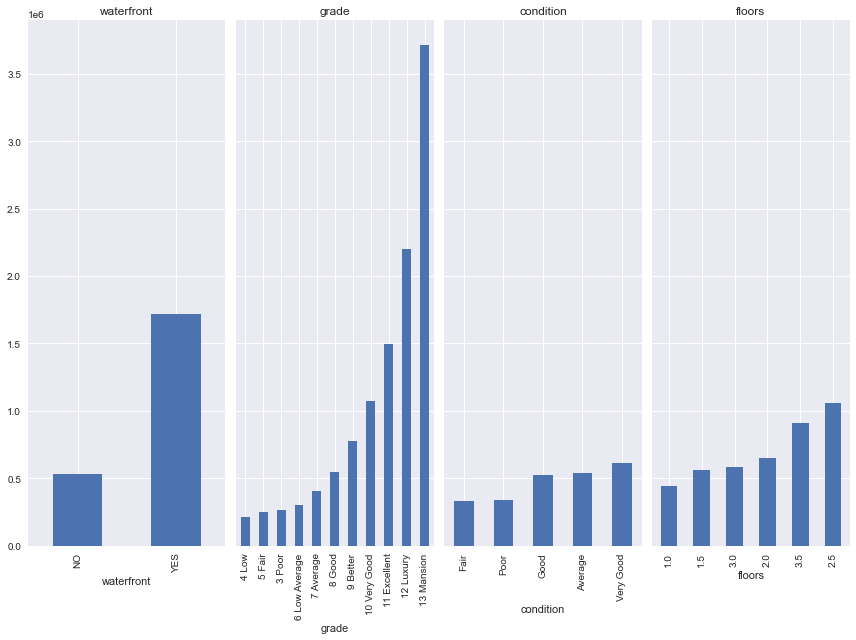

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,9), sharey=True)

categoricals = ['waterfront','grade','condition',"floors"]

for col, ax in zip(categoricals, axes.flatten()):
    (house.groupby(col)               # group values together by column of interest
         .mean()['price']       # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

##### Convert Categorical Features into Numbers
A built-in assumption of the scikit-learn library is that all data being fed into a machine learning model is already in a numeric format, otherwise you will get a ValueError when you try to fit a model. In this step you will use an OrdinalEncoder to replace data within individual non-numeric columns with 0s and 1s, and a OneHotEncoder to replace columns containing more than 2 categories with multiple "dummy" columns containing 0s and 1s.

At this point, a scikit-learn model should be able to run without errors!

#### Create dummy variables
Create dummy variables for the categorical features you chose remembering to drop the first. Drop the categorical columns that you used, concat the dummy columns to our continuous variables and asign it to a new variable

In [15]:
# Create dummy variables for the categorical features
dummies = pd.get_dummies(house[categoricals], prefix=categoricals, drop_first=True)
dummies

,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,condition_Fair,condition_Good,condition_Poor,condition_Very Good,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
21593,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
21594,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
21595,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [16]:
# Drop the categoricals variables from the house data frame
house_preprocessed = house.drop(['waterfront','grade','condition',"floors"], axis=1)

#### Combine Categorical and Continuous Features
Finally,we want to concatenate the new dataframe together with the original house_preprocessed.

In [17]:
# Join the dummies data frame and house_preprocessed
# Display the five top rows by using .head method.
house_preprocessed = pd.concat([house_preprocessed,dummies],axis=1)
house_preprocessed.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,...,grade_9 Better,condition_Fair,condition_Good,condition_Poor,condition_Very Good,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,221900.0,3,1.00,1180,5650,1955,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,1951,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,180000.0,2,1.00,770,10000,1933,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1965,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1987,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ok, everything is numeric now! We have completed the minimum necessary preprocessing to use these features in a model!

## Modeling

#### Perform a Train-Test Split
Use train_test_split with the default split size. At the end you should have X_train, X_test, y_train, and y_test variables, where y represents Price and X represents all other columns.

In [18]:
from sklearn.model_selection import train_test_split

The prediction target for this analysis is the price of the home, so we separate the data into X and y accordingly:

In [19]:
X = house_preprocessed.drop(columns=["price"],axis=1)
y = house_preprocessed["price"]

Next, we separate the data into a train set and a test set prior to performing any preprocessing steps:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Prepare Both Sets for Modeling

In [21]:
# Display the five top rows of X_train by using .head method.
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,...,grade_9 Better,condition_Fair,condition_Good,condition_Poor,condition_Very Good,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
6243,4,2.00,1440,4855,1972,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8986,3,1.75,1430,9857,1980,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9419,4,2.75,3120,5000,2010,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
10155,4,2.50,2060,6958,1974,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10436,3,2.00,2500,4080,1922,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [22]:
X_train.isna().sum()

bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
yr_built               0
waterfront_YES         0
grade_11 Excellent     0
grade_12 Luxury        0
grade_13 Mansion       0
grade_3 Poor           0
grade_4 Low            0
grade_5 Fair           0
grade_6 Low Average    0
grade_7 Average        0
grade_8 Good           0
grade_9 Better         0
condition_Fair         0
condition_Good         0
condition_Poor         0
condition_Very Good    0
floors_1.5             0
floors_2.0             0
floors_2.5             0
floors_3.0             0
floors_3.5             0
dtype: int64

In [23]:
# Check the shape of the X_train data frame by using .shape
X_train.shape

(17277, 25)

X_train is a DataFrame with  17277 rows and 62 columns.

In [24]:
# Display the five top rows of X_test by using .head method.
X_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,...,grade_9 Better,condition_Fair,condition_Good,condition_Poor,condition_Very Good,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
3686,3,0.75,850,8573,1945,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10247,3,1.00,1510,6083,1940,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4037,4,2.25,1790,42000,1983,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3437,2,1.50,1140,2500,1988,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19291,3,1.00,1500,3920,1947,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Check the shape of the X_test data frame by using .shape
X_test.shape

(4320, 25)

X_test is a DataFrame with 4320 rows and 36 columns.

#### Continuous Features
Lets take a look on the both X_train and X_test datasets and extract the continuous Features.

In [26]:
# Continuous Features
continuous = ["sqft_living","yr_built","sqft_lot","bedrooms","bathrooms"]

In [27]:
# Continuous Features for each X_train and  X_test datasets.
X_train_cont = X_train[continuous] 
X_test_cont = X_test[continuous]

#### A visualization of the distribution of the target variable:
let's take a look on the target distribution by using histogram.

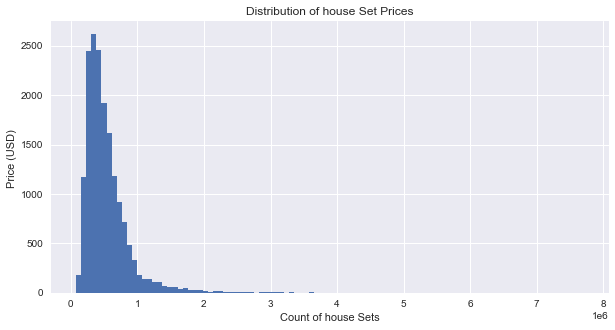

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(y_train, bins=100)

ax.set_xlabel("Count of house Sets")
ax.set_ylabel("Price (USD) ")
ax.set_title("Distribution of house Set Prices");

We can notice that the distribution of the target (price) is positively skewed when the tail on the right side of the distribution is longer (also often called "fatter"). When there is positive skewness, the mean and median are bigger than the mode.

### 1. Baseline Model
For bulding the Baseline Model we need to discover which feature from the X_train data set has the highest colinearity with the target,We can do that by using heat map for continious variables.

In [29]:
# Display continious variable of X_train dataset.
X_train_cont

,sqft_living,yr_built,sqft_lot,bedrooms,bathrooms
6243,1440,1972,4855,4,2.00
8986,1430,1980,9857,3,1.75
9419,3120,2010,5000,4,2.75
10155,2060,1974,6958,4,2.50
10436,2500,1922,4080,3,2.00
...,...,...,...,...,...
11964,2230,2004,5800,3,2.50
21575,2770,2014,3852,4,2.75
5390,1530,1976,9000,4,1.50
860,380,1963,15000,1,0.75


#### 1. Interpret a Correlation Heatmap to Build a Baseline Model


#### Heat map for continious variables
The code below produces a heatmap showing the correlations between all of the numeric values in our training data. The x and y axis labels indicate the pair of values that are being compared, and then the color and the number are both representing the correlation.

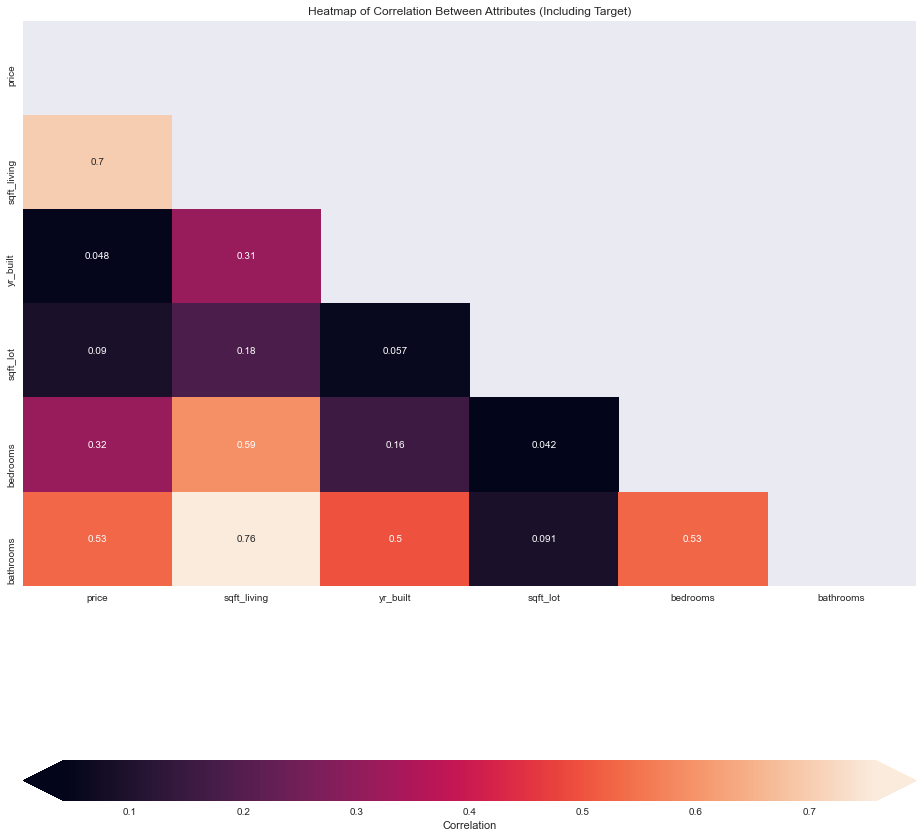

In [30]:
# Create a df with the target as the first column,
# then compute the correlation matrix

heatmap_data = pd.concat([y_train,X_train_cont], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(16, 16))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");


Based on the plot above,The  most strongly feater correlated with the target (price) is Square footage of living space in the home.   

In [31]:
most_correlated_feature = "sqft_living"

Let's make a scatter plot to check linearity between the Square footage of living space in the home

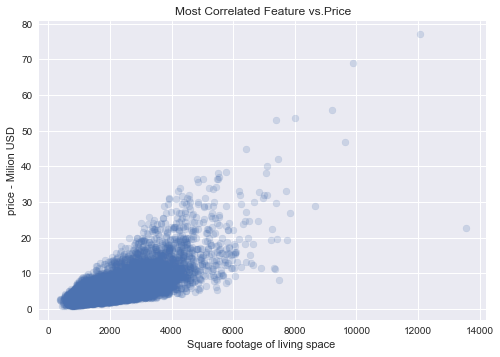

In [32]:
# create the figure
fig, ax = plt.subplots()
# create a scatter plot 
ax.scatter(X_train[most_correlated_feature],y_train/100000, alpha=0.2)
# Add labels
ax.set_xlabel("Square footage of living space ")
ax.set_ylabel("price - Milion USD")
# Add title
ax.set_title("Most Correlated Feature vs.Price");

clear linear relationship between the Square footage of living space feature and the target (price).

#### Building a Baseline Model
Now, we'll build a linear regression model using just the Square footage of living feature, which will serve as our baseline model, we will be using a LinearRegression model from scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [33]:
# import LinearRegression model from sklearn library
from sklearn.linear_model import LinearRegression

#### Fit a Model
Fit a linear regression model on the training set

In [34]:
# instantiate a LinearRegression model called baseline_model
baseline_model = LinearRegression()

In [35]:
# Fit the model on X_train and y_train
baseline_model.fit(X_train, y_train)


LinearRegression()

Let's use cross validation to take a look at the model's performance:

Then we evaluate the model using cross_validate and ShuffleSplit, which essentially means that we perform 3 separate train-test splits within our X_train and y_train, then we find both the train and the test scores for each.

In [36]:
# evaluate a model using X_train
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.2, random_state=24)

baseline_scores = cross_validate(
    estimator = baseline_model,
    X = X_train[[most_correlated_feature]],
    y = y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4906105322840632
Validation score: 0.4994294302788367


#### Because we are using the .score method of LinearRegression, these are r-squared scores.

That means that each of them represents the amount of variance of the target (price) that is explained by the model's feature ("Square footage of living") and parameters (intercept value and coefficient values for the features)

In general this seems like a fairly not strong model. It is getting nearly identtcal performance on training subsets compared to the validation subsets, explaining around 50% of variation by the relationship between the dependent variable (price) and the independent variable (Square footage of living space in the home.

### 2.Second model
Build a Model with All Numeric Features

##### Plot histograms with kde overlay to check the distribution of the predictors
Since there are so many features it is helpful to filter the columns by datatype and number of unique values.
We use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.

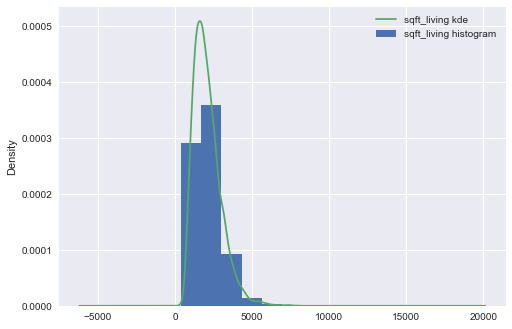

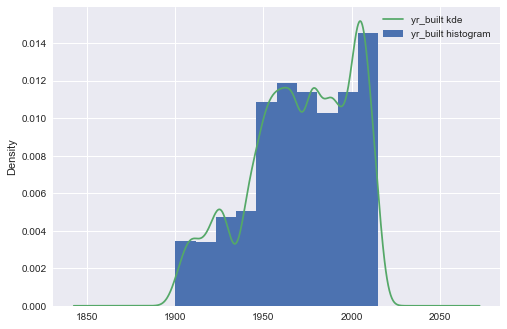

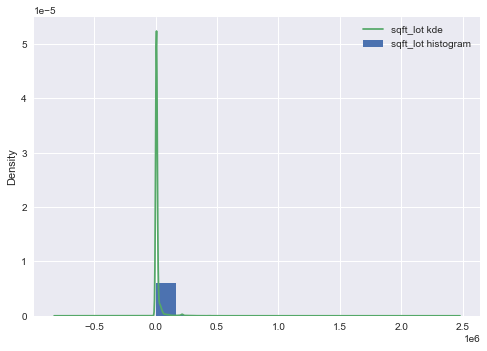

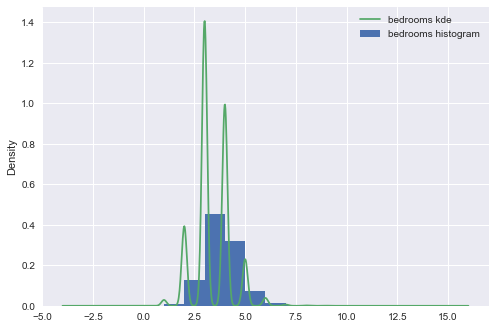

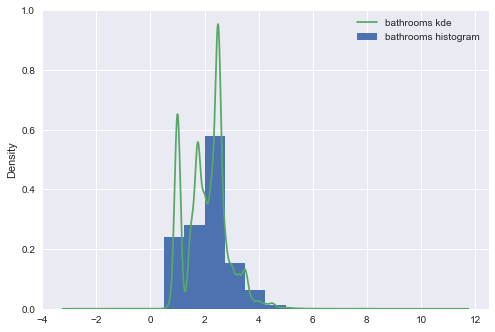

In [37]:
# For all the variables, check distribution by creating a histogram with kde

for column in X_train[continuous] :
    X_train[continuous][column].plot.hist(density=True, label = column+' histogram')
    X_train[continuous][column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

Now we can look at scatter plots of all continious features compared to the target for X_train :

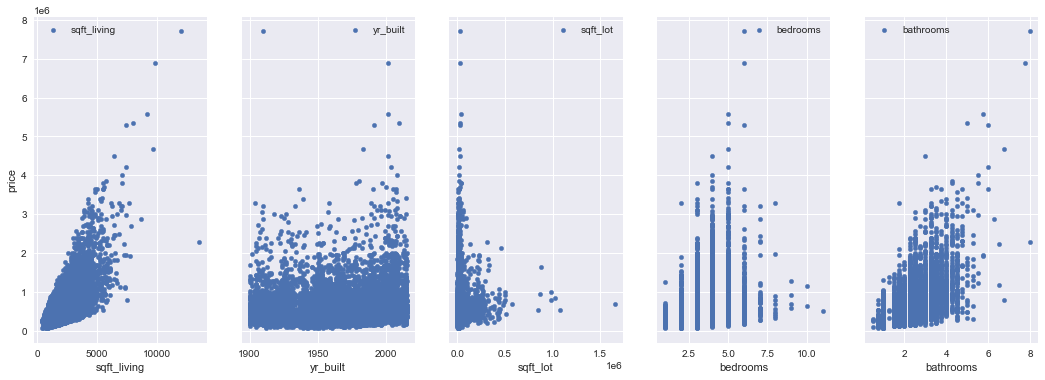

In [38]:
# visualize the relationship between the preditors and the target using scatterplots
fig, axs = plt.subplots(1,5, sharey=True, figsize=(18, 6))
scatterplot_data = pd.concat([X_train_cont, y_train],axis = 1)

for idx, feature in enumerate(X_train_cont):
    scatterplot_data.plot(kind='scatter', x=feature, y='price', ax=axs[idx], label=feature)
plt.legend()
plt.show()

A linear pattern shows on sqft_lot .
yr_built is worse, there is too much variance along the y-axis and there's no clear linear relationship between yr_built and price.So we need to remove the yerar bulit feature from both X_train and x_test data sets.

In [39]:
# Drop yr_built column from X_train using .drop() method
# Display the top five rows of X_train_second_model data frame
X_train_second_model = X_train.drop(["yr_built"],axis = 1)
X_train_second_model.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,...,grade_9 Better,condition_Fair,condition_Good,condition_Poor,condition_Very Good,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
6243,4,2.00,1440,4855,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8986,3,1.75,1430,9857,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9419,4,2.75,3120,5000,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
10155,4,2.50,2060,6958,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10436,3,2.00,2500,4080,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [40]:
# Drop yr_built column from X_test_numeric using .drop() method
# Display the top five rows of X_test_second_model data frame
X_test = X_test.drop(["yr_built"],axis = 1)
X_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,...,grade_9 Better,condition_Fair,condition_Good,condition_Poor,condition_Very Good,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
3686,3,0.75,850,8573,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10247,3,1.00,1510,6083,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4037,4,2.25,1790,42000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3437,2,1.50,1140,2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19291,3,1.00,1500,3920,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Building and Evaluating the Second Model
In the cell below, we use the same process to evaluate a model using X_train_second_model .

#### Fit a Model
Fit a linear regression model on the training set

In [41]:
# instantiate a LinearRegression model called second_model
second_model = LinearRegression()

In [42]:
# Fit the second model on train data set
second_model.fit(X_train_second_model, y_train)

LinearRegression()

#### Calculate MSE
Calculate the mean squared error on the test set

In [43]:
from sklearn.metrics import mean_squared_error
y_hat_test = second_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

51199164102.9016

In [44]:
# evaluate a model using X_train
second_model_scores = cross_validate(
    estimator = second_model,
    X = X_train_second_model,
    y = y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6469253900363975
Validation score: 0.6386380459038569

Baseline Model
Train score:      0.4906105322840632
Validation score: 0.4994294302788367


Our second model got better scores on the training data and Validation data

Now ,It is better to get a summary of the second model.By using statsmodels library.

In statistics, ordinary least square (OLS) regression is a method for estimating the unknown parameters in a linear regression model.

In [45]:
# import statsmodels library

import statsmodels.api as sm
import statsmodels.formula.api as smf
# create predictors
predictors = X_train_second_model
# create model intercept
X_int = sm.add_constant(X_train_second_model)
#  fit the ols model
model2 = sm.OLS(y_train,X_int).fit()
# get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     1315.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:43:39   Log-Likelihood:            -2.3700e+05
No. Observations:               17277   AIC:                         4.740e+05
Df Residuals:                   17252   BIC:                         4.742e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.628e+05   1.35e+04     41.788      0.000    5.36e+05    5.89e+05
bedrooms            -2.715e+04   2457.760    -11.047      0.000    -3.2e+04   -2.23e+04
bathrooms             1.91e+04   3835.918      4.980      0.000    1.16e+04    2.66e+04
sqft_living           162.8246      3.922     41.511      0.000     155.136     170.513
sqft_lot               -0.4163      0.043     -9.759      0.000      -0.500      -0.333
waterfront_YES       7.579e+05   2.05e+04     36.910      0.000    7.18e+05    7.98e+05
grade_11 Excellent   2.745e+05   1.47e+04     18.698      0.000    2.46e+05    3.03e+05
grade_12 Luxury       7.46e+05   2.77e+04     26.943      0.000    6.92e+05       8e+05
grade_13 Mansion      2.21e+06   6.81e+04     32.428      0.000    2.08e+06    2.34e+06
grade_3 Poor        -4.935e+05    2.2e+05     -2.244      0.025   -9.25e+05   -6.24e+04
grade_4 Low         -4.671e+05   5.17e+04     -9.032      0.000   -5.68e+05   -3.66e+05
grade_5 Fair        -4.757e+05   1.93e+04    -24.672      0.000   -5.14e+05   -4.38e+05
grade_6 Low Average -4.485e+05   1.19e+04    -37.750      0.000   -4.72e+05   -4.25e+05
grade_7 Average     -4.047e+05   9829.300    -41.175      0.000   -4.24e+05   -3.85e+05
grade_8 Good        -3.277e+05   9028.631    -36.292      0.000   -3.45e+05    -3.1e+05
grade_9 Better       -1.83e+05   9007.175    -20.313      0.000   -2.01e+05   -1.65e+05
condition_Fair       5590.3140   1.91e+04      0.292      0.770   -3.19e+04    4.31e+04
condition_Good       4.802e+04   4092.751     11.733      0.000       4e+04     5.6e+04
condition_Poor       2381.1556   5.08e+04      0.047      0.963   -9.72e+04    1.02e+05
condition_Very Good  1.263e+05   6464.070     19.542      0.000    1.14e+05    1.39e+05
floors_1.5           8.281e+04   6158.082     13.447      0.000    7.07e+04    9.49e+04
floors_2.0          -5.037e+04   4592.375    -10.969      0.000   -5.94e+04   -4.14e+04
floors_2.5           1.594e+05   1.99e+04      7.989      0.000     1.2e+05    1.98e+05
floors_3.0           3.905e+04   1.08e+04      3.609      0.000    1.78e+04    6.03e+04
floors_3.5           1.454e+05   8.32e+04      1.748      0.081   -1.77e+04    3.08e+05
==============================================================================
Omnibus:                     8429.057   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146069.301
Skew:                           1.924   Prob(JB):                         0.00
Kurtosis:                      16.715   Cond. No.                     5.65e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+06. 

We can notice by the model summary there are strong multicollinearity among the features.

 R squared refers to :In this model around 64% of variation explained by the relationship between the dependent variable (price) and the independent variables .

Lets explain some concepts that apear on the model summary:

###### Coefficients: 
The coefficients of the features also describe the mathematical relationship between each independent variable and the dependent variable, which in this case is the house pricing based on house feature.

The coefficient value helps us understand the marginal effect of the features on the dependent variable. Given a one-unit change in the feature variable when the other features are unchanged, how much is the dependent variable changed.

From the Tornado Diagram
The only trick to getting a tornado diagram is that the coefficients have to be sorted in descending order by the absolute value of the coefficient.
inform us if there is a positive or negative correlation between the features and target.

###### R-squared
The percentage of variation explained by the relationship between the dependent variable and the independent variables. Lies within values between 0 and 1.
In this case , the relationship between the dependent variable and the independent variables explains 64% of the variation in the data.


###### P>|t| or p-value
p-values for the t-test

Again we can compare the p-values, or likelihood that we would observe our data by random chance if our features had no statistically significant relationship to the charges variable. When we compare the p-values of our features with a significance threshold of 0.05individually, if:

𝑝 < .05 : Reject that there is no relationship between the features of our model and  the target (price)

𝑝 >= .05 : Accept the null hypothesis. There is no relationship between the features of our model and the target (price)

We suspect our model's issues are related to multicollinearity, let's try to narrow down those features. 

### Selecting Features

I will discuss using coefficients of regression models for selecting and interpreting features.

This is based on the idea that when all features are on the same scale, the most important features should have the highest coefficients in the model, while features uncorrelated with the output variables should have coefficient values close to zero.

#### Selecting Features with sklearn.feature_selection
Scikit-learn has a submodule called feature_selection that includes tools to help reduce the feature set.
We'll use RFECV (documentation here). "RFE" stands for "recursive feature elimination", meaning that it repeatedly scores the model, finds and removes the feature with the lowest "importance", then scores the model again.
If the new score is better than the previous score, it continues removing features until the minimum is reached.
"CV" stands for "cross validation" here, and we can use the same splitter we have been using to test our data so far.).

In [46]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_second_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_second_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: True
waterfront_YES: True
grade_11 Excellent: True
grade_12 Luxury: True
grade_13 Mansion: True
grade_3 Poor: False
grade_4 Low: True
grade_5 Fair: True
grade_6 Low Average: True
grade_7 Average: True
grade_8 Good: True
grade_9 Better: True
condition_Fair: False
condition_Good: True
condition_Poor: False
condition_Very Good: True
floors_1.5: True
floors_2.0: True
floors_2.5: True
floors_3.0: True
floors_3.5: False


 measure multicollinearity is with variance inflation factor (StatsModels documentation here). A "rule of thumb" for VIF is that 5 is too high 

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = X_train_second_model
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

print(vif_data)

                feature        VIF
0              bedrooms  25.767660
1             bathrooms  25.516871
2           sqft_living  24.849685
3              sqft_lot   1.199303
4        waterfront_YES   1.032129
5    grade_11 Excellent   1.357352
6       grade_12 Luxury   1.145353
7      grade_13 Mansion   1.056161
8          grade_3 Poor   1.000900
9           grade_4 Low   1.007625
10         grade_5 Fair   1.091715
11  grade_6 Low Average   1.666496
12      grade_7 Average   4.711240
13         grade_8 Good   3.755563
14       grade_9 Better   2.297140
15       condition_Fair   1.032460
16       condition_Good   1.561808
17       condition_Poor   1.017119
18  condition_Very Good   1.192112
19           floors_1.5   1.205132
20           floors_2.0   2.846163
21           floors_2.5   1.048339
22           floors_3.0   1.190596
23           floors_3.5   1.005244


In [48]:
bad_feature = ["condition_Fair","condition_Poor","grade_3 Poor","floors_3.5","bathrooms"]              

We will remove these bad features from our X_train and X_test for second model to prepear the data set for next model.

In [49]:
# Drop the bad features from X_train_second_model
# Display the top five rows of  X_train_second_model
X_train_second_model = X_train_second_model.drop(X_train_second_model[bad_feature],axis = 1)
X_train_second_model.head()

,bedrooms,sqft_living,sqft_lot,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,condition_Good,condition_Very Good,floors_1.5,floors_2.0,floors_2.5,floors_3.0
6243,4,1440,4855,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
8986,3,1430,9857,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
9419,4,3120,5000,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
10155,4,2060,6958,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
10436,3,2500,4080,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0


In [50]:
# Drop the bad features from X_test.
X_test = X_test.drop(X_test[bad_feature],axis = 1)

### Model3 :

Now ,after we  removed the features that thier p values not significant.Let's build the third model.

In [51]:
# use the cleaned X_train data fram wich we got from second model
X_train_third_model = X_train_second_model

In [52]:
# Check the shape of the X_train_third_model
X_train_third_model.shape

(17277, 19)

In [53]:
# Check the shape of the X_test
X_test.shape

(4320, 19)

Look at the histgrams for the continuous variables in X_train third model and X_test numeric datasets.

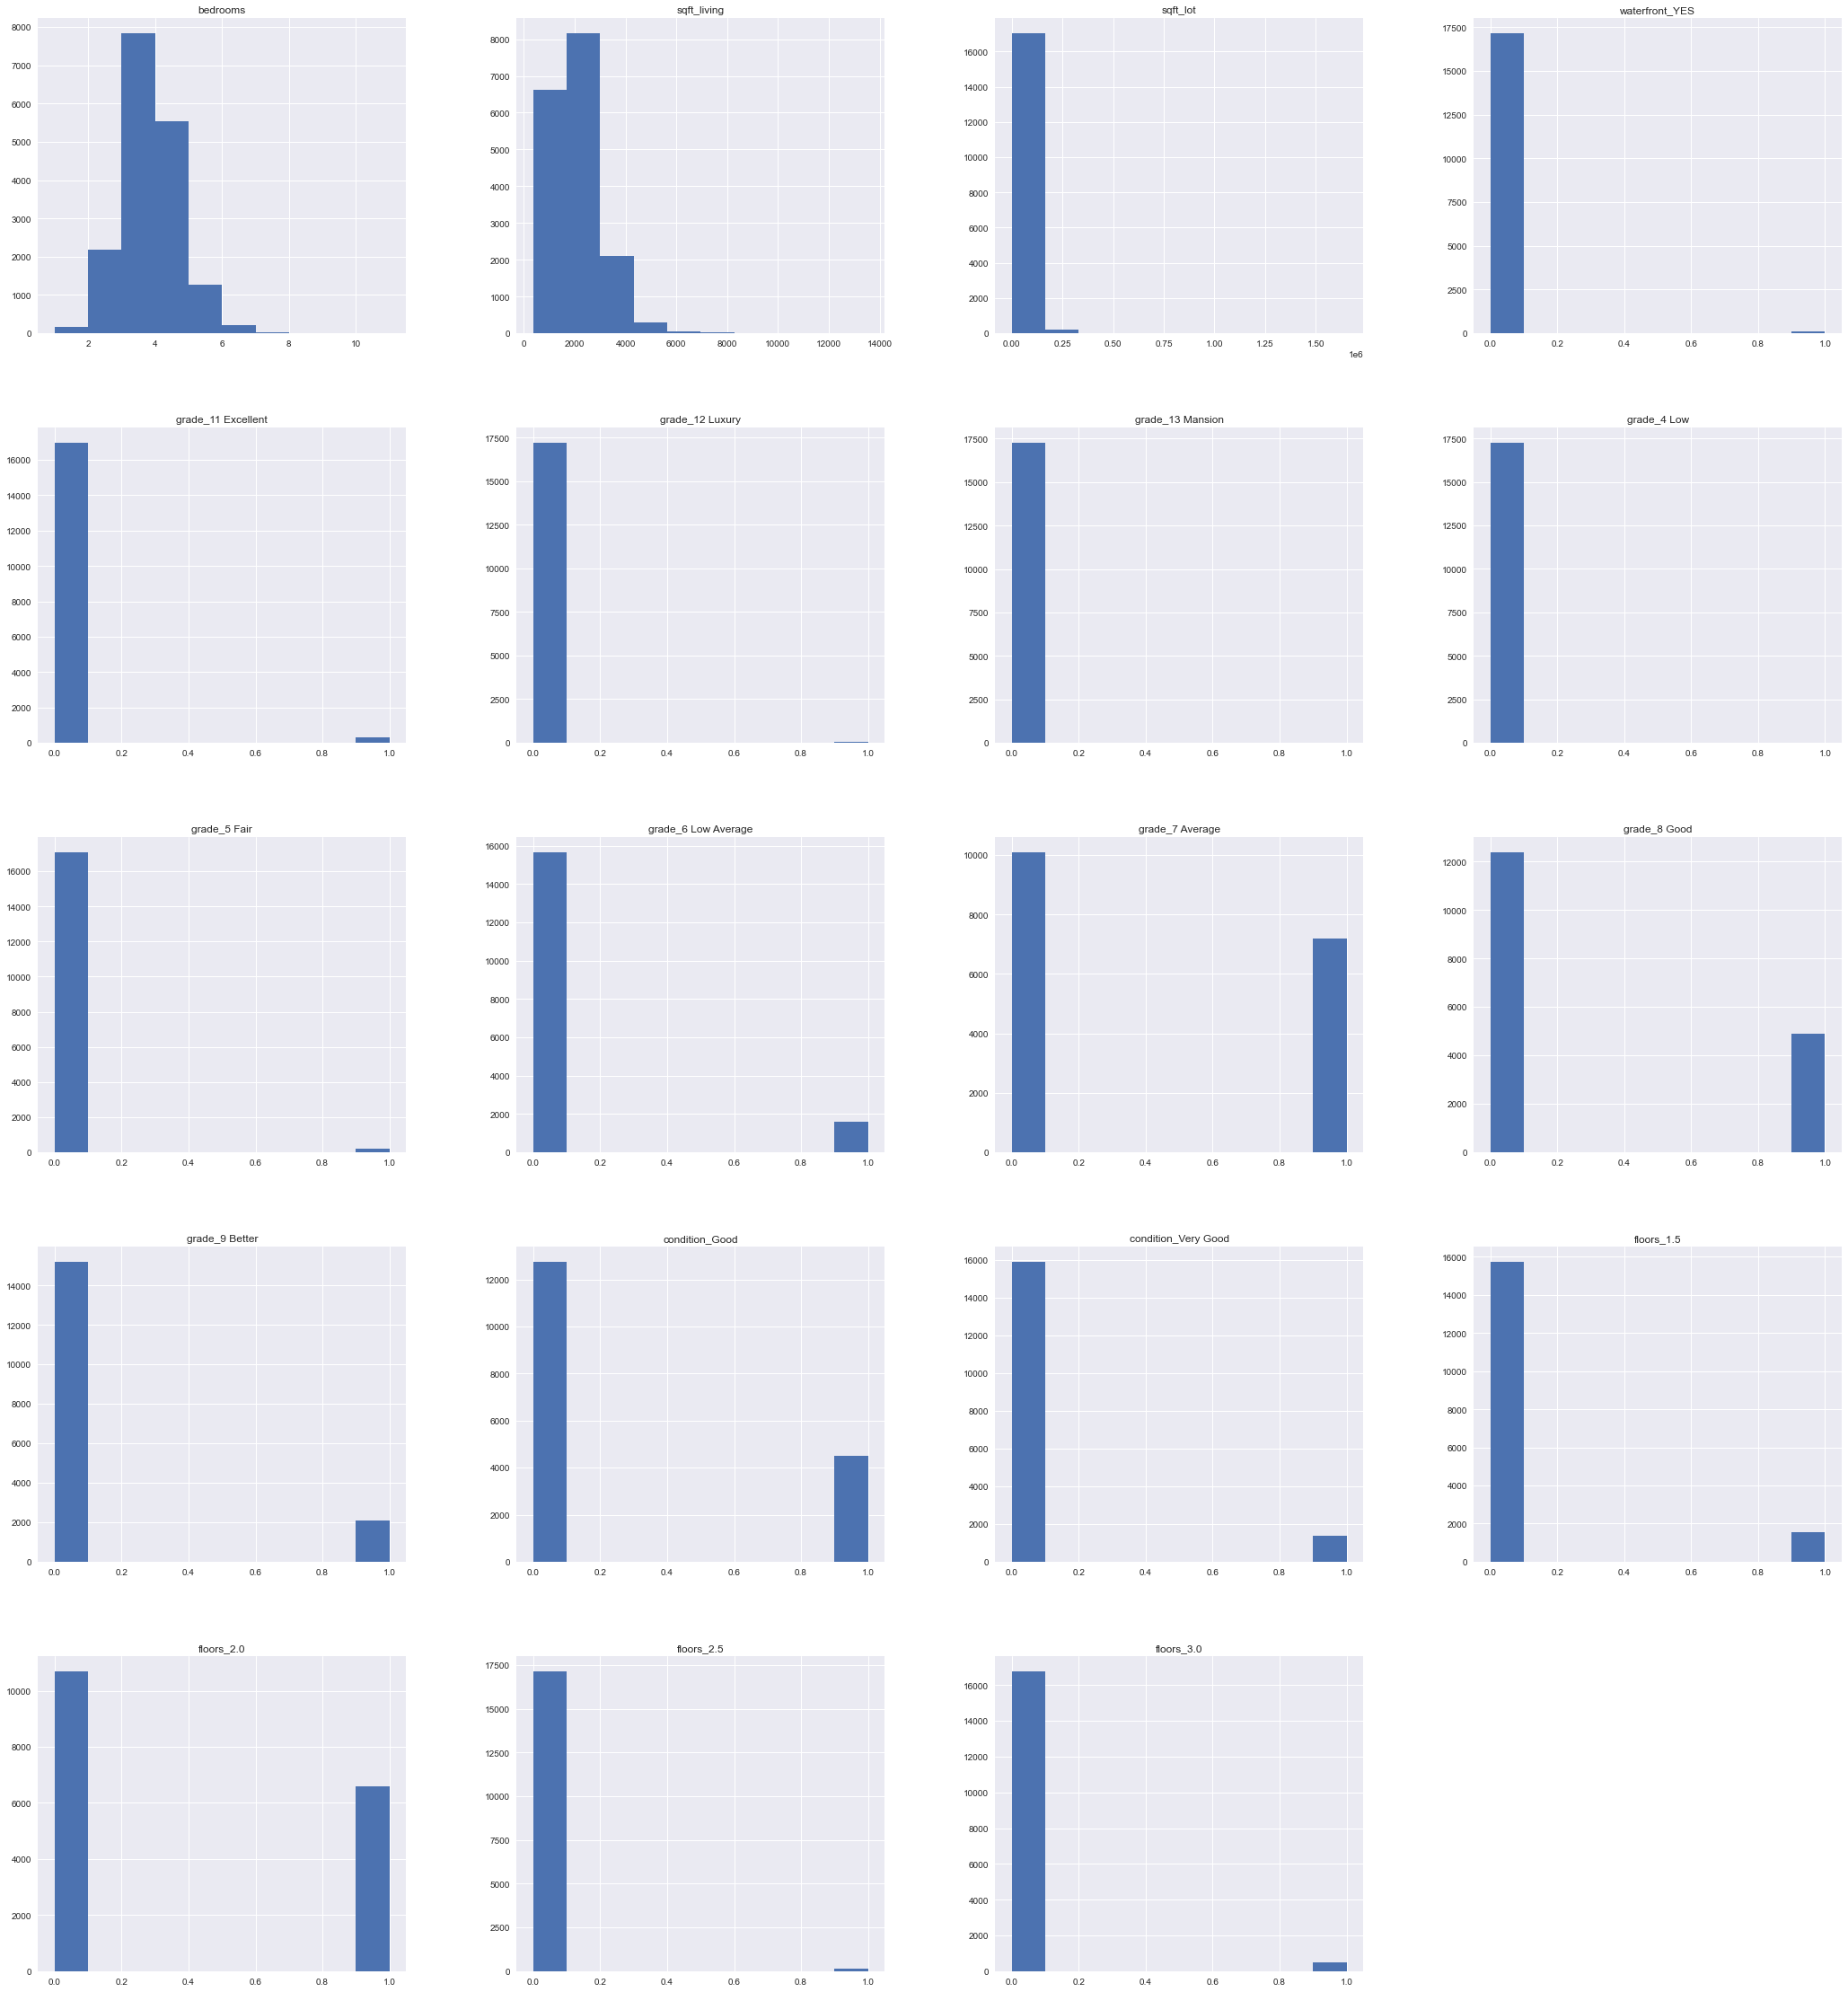

In [54]:
# create a histogram plots for X_train data set.
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (36,40))
ax = fig.gca()
X_train_third_model.hist(ax = ax);

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

In [55]:
# Select the contiuous features from X_train third model data set.
conts = ["sqft_living","sqft_lot","bedrooms"]
X_train_third_model_conts = X_train_third_model[conts]

#### Perform log transformations for the variables where it makes sense
One common option for transforming non-normal variable distributions is to try applying a logarithmic function and observe its impact of the distribution.

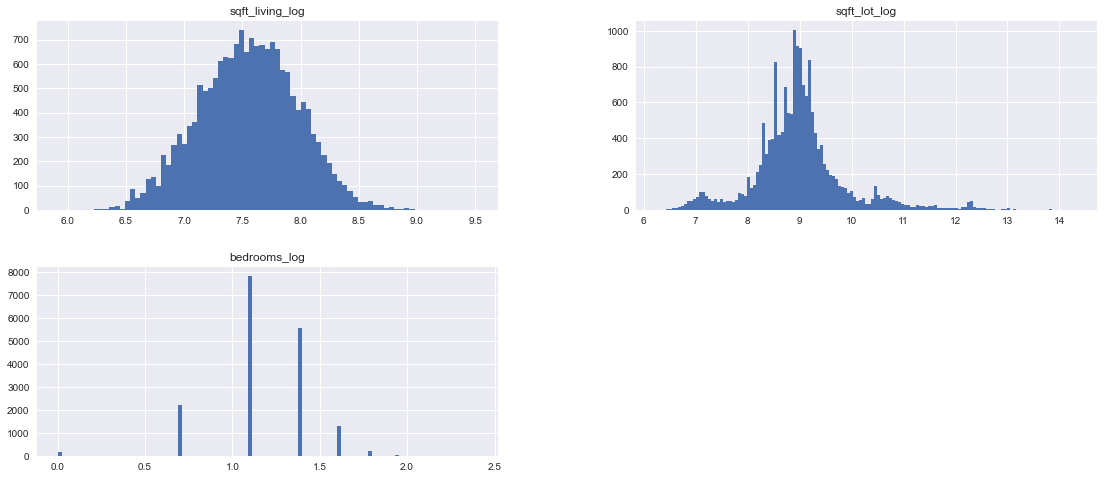

In [56]:
# use numpy library 
import numpy as np
# use log transformation to transforming Non-Normal Features
log_names = [f'{column}_log' for column in X_train_third_model_conts.columns]

X_train_log = np.log(X_train_third_model_conts)
X_train_log.columns = log_names
X_train_log.hist(figsize=(19, 8), bins='auto')
fig.tight_layout();

#### Feature Scaling and Normalization
This is because most machine learning algorithms use Euclidean distance between two data points in their computations. Because of that, making sure that features have similar scales is formally required there. Some algorithms even require features to be zero centric.

A good rule of thumb is, however, to check your features for normality, and while you're at it, scale your features so they have similar magnitudes

We will define a fuction 

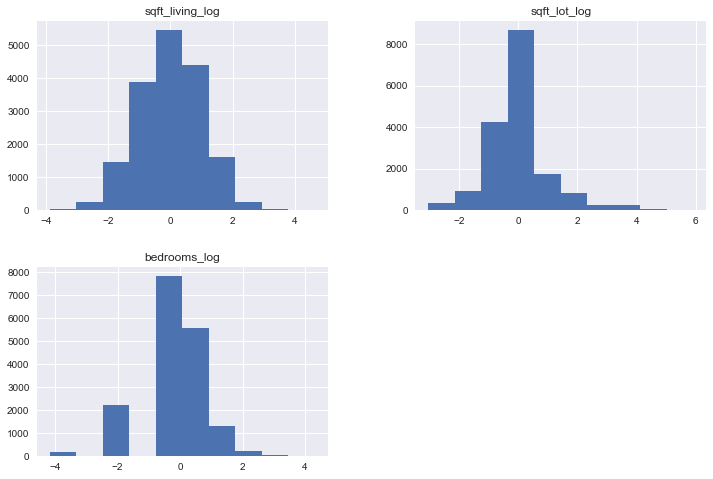

In [57]:
# Create a function for normalize and scale the data set.
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
# Apply the normalize function to the data set
features_final = X_train_log.apply(normalize)
# create a histgram plot.
features_final.hist(figsize  = [12, 8]);

Lets view  the continious features after scaling

In [58]:
# view the continious features after scaling
features_final

,sqft_living_log,sqft_lot_log,bedrooms_log
6243,-0.661437,-0.557527,0.733727
8986,-0.677889,0.228192,-0.282461
9419,1.164030,-0.524875,0.733727
10155,0.183934,-0.158236,0.733727
10436,0.640979,-0.750483,-0.282461
...,...,...,...
11964,0.371147,-0.360203,-0.282461
21575,0.883110,-0.814284,0.733727
5390,-0.518305,0.127275,0.733727
860,-3.806766,0.694037,-4.163121


In [59]:
# remove the features before log and normalize
X_train_third_model = X_train_third_model.drop(columns = ["sqft_living","sqft_lot","bedrooms"],axis = 1)
X_train_third_model.head()

,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,condition_Good,condition_Very Good,floors_1.5,floors_2.0,floors_2.5,floors_3.0
6243,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
8986,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
9419,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
10155,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
10436,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0


We want to concatenate the new dataframe (features_final) together with the X_train for third model

In [60]:
# concat the X_train_third_model with final feature by using .concat()method.
X_train_third_model = pd.concat([features_final,X_train_third_model],axis = 1)
X_train_third_model.head()

,sqft_living_log,sqft_lot_log,bedrooms_log,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,condition_Good,condition_Very Good,floors_1.5,floors_2.0,floors_2.5,floors_3.0
6243,-0.661437,-0.557527,0.733727,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
8986,-0.677889,0.228192,-0.282461,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
9419,1.164030,-0.524875,0.733727,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
10155,0.183934,-0.158236,0.733727,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
10436,0.640979,-0.750483,-0.282461,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0


In [61]:
# view X_train columns
X_train_third_model.columns

Index(['sqft_living_log', 'sqft_lot_log', 'bedrooms_log', 'waterfront_YES',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'condition_Good',
       'condition_Very Good', 'floors_1.5', 'floors_2.0', 'floors_2.5',
       'floors_3.0'],
      dtype='object')

<AxesSubplot:>

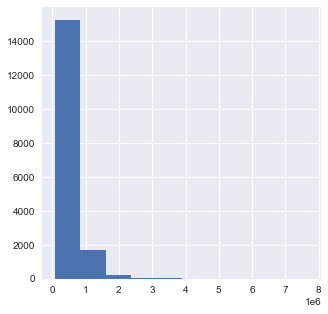

In [62]:
# plot the  target histgram
y_train.hist(figsize  = (5,5))

We can notice the target (price) positivaly skwied 

In [63]:
# take log transform for target 
# normalize the target
y_train_log = np.log(y_train)
y_train_scale = normalize(y_train_log)

<AxesSubplot:>

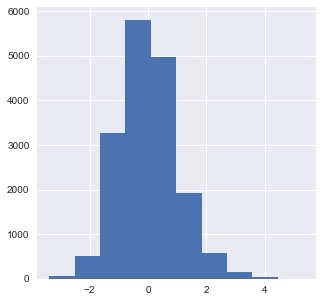

In [64]:
# visualize the scaled target (price) by using histgram
y_train_scale.hist(figsize = (5,5))

Lets make the same changes on X_test dataset.

In [65]:
# check for the continious features on X_test dataset
X_test_conts = X_test[conts]

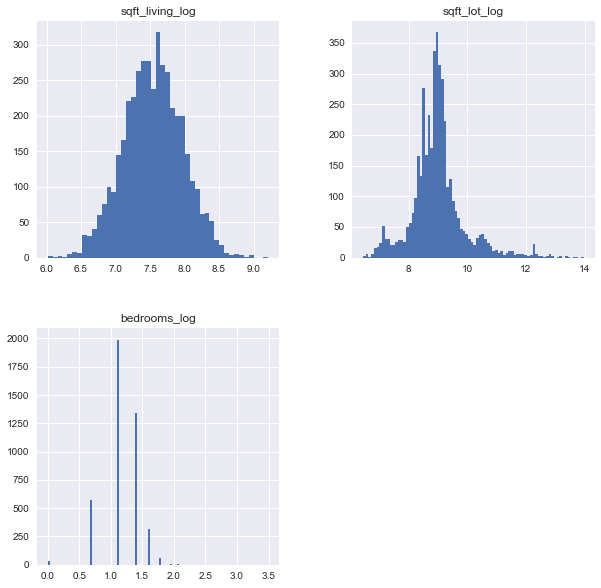

In [66]:
# Apply log transform for continious features on X_test.
log_names = [f'{column}_log' for column in X_test_conts.columns]

X_test_log = np.log(X_test_conts)
X_test_log.columns = log_names
X_test_log.hist(figsize=(10, 10), bins='auto')
fig.tight_layout();

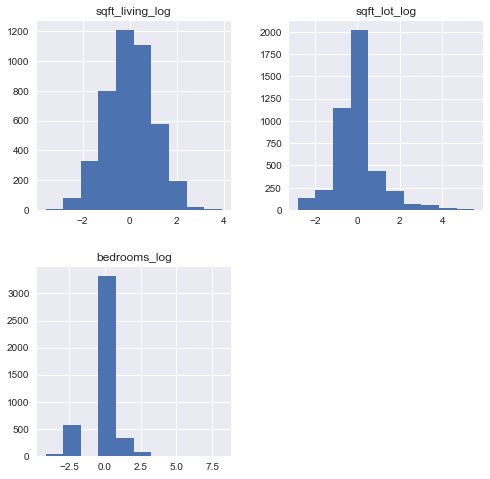

In [67]:
# apply scale for the X_test
feature_scale = X_test_log.apply(normalize)

feature_scale.hist(figsize  = (8, 8));

In [68]:
# drop the non normal distribution columns from x_test dataset.
X_test = X_test.drop(columns = ["sqft_living","sqft_lot","bedrooms"],axis = 1)

We want to concatenate the new dataframe (features_scale) together with the X_test. 

In [69]:
# concat the X_test with  feature_scale by using .concat()method.
X_test = pd.concat([feature_scale,X_test],axis = 1)
X_test.head()

,sqft_living_log,sqft_lot_log,bedrooms_log,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,condition_Good,condition_Very Good,floors_1.5,floors_2.0,floors_2.5,floors_3.0
3686,-1.870573,0.075574,-0.268749,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10247,-0.523849,-0.303454,-0.268749,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4037,-0.125182,1.830925,0.746178,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3437,-1.182603,-1.285719,-1.699209,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
19291,-0.539422,-0.788845,-0.268749,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [70]:
# check for the X_test data set by using .shape
X_test.shape

(4320, 19)

In [71]:
# apply the log transform on the target in the test data set
# apply normalize function on the target in the test data set
y_test_log = np.log(y_test)
y_test_scale = normalize(y_test_log)

<AxesSubplot:>

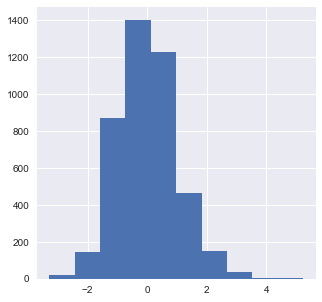

In [72]:
# plot the target after updating
y_test_scale.hist(figsize = (5,5))

#### Building and Evaluating the Thired Model
Now let's build a model using those significant features only:

In the cell below, we use the same process to evaluate a model using X_train_third_model.

In [73]:
# instantiate a LinearRegression model called third_model
third_model = LinearRegression()

#### Fit the third model

In [74]:
# Fit the third model on train data set
third_model.fit(X_train_third_model, y_train_scale)

LinearRegression()

In [75]:
# evauate the model
third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train_scale ,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6005011176347707
Validation score: 0.6046944147658806

Baseline Model
Train score:      0.4906105322840632
Validation score: 0.4994294302788367


In [76]:
# create a model intercept
X_int = sm.add_constant(X_train_third_model)
# fit the model on the train data set
model3 = sm.OLS(y_train_scale,X_int).fit()
# getting the summary
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     1371.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:43:50   Log-Likelihood:                -16566.
No. Observations:               17277   AIC:                         3.317e+04
Df Residuals:                   17257   BIC:                         3.333e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.9539      0.026     36.927      0.000       0.903       1.005
sqft_living_log         0.4503      0.009     47.658      0.000       0.432       0.469
sqft_lot_log           -0.1027      0.006    -17.970      0.000      -0.114      -0.092
bedrooms_log           -0.0902      0.007    -13.820      0.000      -0.103      -0.077
waterfront_YES          1.1996      0.059     20.311      0.000       1.084       1.315
grade_11 Excellent      0.4355      0.042     10.430      0.000       0.354       0.517
grade_12 Luxury         0.9099      0.078     11.674      0.000       0.757       1.063
grade_13 Mansion        1.7750      0.193      9.214      0.000       1.397       2.153
grade_4 Low            -1.9657      0.149    -13.165      0.000      -2.258      -1.673
grade_5 Fair           -1.8162      0.056    -32.711      0.000      -1.925      -1.707
grade_6 Low Average    -1.5911      0.034    -47.192      0.000      -1.657      -1.525
grade_7 Average        -1.2873      0.027    -47.693      0.000      -1.340      -1.234
grade_8 Good           -0.9091      0.025    -36.608      0.000      -0.958      -0.860
grade_9 Better         -0.4167      0.026    -16.324      0.000      -0.467      -0.367
condition_Good          0.1466      0.012     12.497      0.000       0.124       0.170
condition_Very Good     0.3774      0.019     20.326      0.000       0.341       0.414
floors_1.5              0.2894      0.018     16.260      0.000       0.255       0.324
floors_2.0             -0.1491      0.013    -11.363      0.000      -0.175      -0.123
floors_2.5              0.2006      0.058      3.479      0.001       0.088       0.314
floors_3.0              0.0092      0.032      0.285      0.776      -0.054       0.072
==============================================================================
Omnibus:                        8.496   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.478
Skew:                           0.051   Prob(JB):                       0.0144
Kurtosis:                       3.037   Cond. No.                         55.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared:
The percentage of variation explained by the relationship between the dependent variable and the independent variables. Lies within values between 0 and 1. In this case , the relationship between the dependent variable and the independent variables explains 60% of the variation in the data.

Let's compute the MSE as well, since this would be more applicable to a business audience.(the amount of error)

In [77]:
# compute the MSE
from sklearn.metrics import mean_squared_error
y_hat_test = third_model.predict(X_test)
test_mse = mean_squared_error(y_test_scale, y_hat_test)
test_mse

0.40725334549076264

This algorithm will be off by about 40$

#### Selecting Features with sklearn.feature_selection

We'll use RFECV (documentation here). "RFE" stands for "recursive feature elimination", meaning that it repeatedly scores the model, finds and removes the feature with the lowest "importance", then scores the model again. If the new score is better than the previous score, it continues removing features until the minimum is reached. "CV" stands for "cross validation" here, and we can use the same splitter we have been using to test our data so far.

In [78]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_third_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train_scale)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_third_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
sqft_living_log: True
sqft_lot_log: True
bedrooms_log: True
waterfront_YES: True
grade_11 Excellent: True
grade_12 Luxury: True
grade_13 Mansion: True
grade_4 Low: True
grade_5 Fair: True
grade_6 Low Average: True
grade_7 Average: True
grade_8 Good: True
grade_9 Better: True
condition_Good: True
condition_Very Good: True
floors_1.5: True
floors_2.0: True
floors_2.5: True
floors_3.0: False


In [79]:
bad_feature2 = ["floors_3.0"]

### Model4 : Final model

#### Prepering the data for model4:
Removing the bad feature from the X train and X test data set 

In [80]:
# Remove the bad feature from the X train data set using .drop()method
X_train_forth_model = X_train_third_model.drop(X_train_third_model[bad_feature2]
                                                  ,axis = 1)

In [81]:
# # Remove the bad feature from the X test data set using .drop()method
X_test = X_test.drop(X_test[bad_feature2],axis = 1)
X_test.head()

,sqft_living_log,sqft_lot_log,bedrooms_log,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,condition_Good,condition_Very Good,floors_1.5,floors_2.0,floors_2.5
3686,-1.870573,0.075574,-0.268749,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
10247,-0.523849,-0.303454,-0.268749,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4037,-0.125182,1.830925,0.746178,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3437,-1.182603,-1.285719,-1.699209,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
19291,-0.539422,-0.788845,-0.268749,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [82]:
# check for the X_test data set by using .shape
X_test.shape

(4320, 18)

In [83]:
# # check for the X_train data set by using .shape
X_train_forth_model.shape

(17277, 18)

In [84]:
# display the top five rows of X_train_forth_model data set.
X_train_forth_model.head()

,sqft_living_log,sqft_lot_log,bedrooms_log,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,condition_Good,condition_Very Good,floors_1.5,floors_2.0,floors_2.5
6243,-0.661437,-0.557527,0.733727,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
8986,-0.677889,0.228192,-0.282461,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
9419,1.164030,-0.524875,0.733727,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
10155,0.183934,-0.158236,0.733727,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10436,0.640979,-0.750483,-0.282461,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0


In [85]:
# View the columns of X_train_forth_model data set
X_train_forth_model.columns

Index(['sqft_living_log', 'sqft_lot_log', 'bedrooms_log', 'waterfront_YES',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'condition_Good',
       'condition_Very Good', 'floors_1.5', 'floors_2.0', 'floors_2.5'],
      dtype='object')

#### Building and Evaluating the final  Model
In the cell below, we use the same process to evaluate a model using X_train_forth_model.

#### Fit the Forth model

In [86]:
# install a model called forth model
forth_model = LinearRegression()

In [87]:
# Fit the forth model on train data set
forth_model.fit(X_train_forth_model, y_train_scale)

LinearRegression()

In [88]:
# evaluate the forth model
forth_model_scores = cross_validate(
    estimator=forth_model,
    X=X_train_forth_model,
    y=y_train_scale ,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", forth_model_scores["train_score"].mean())
print("Validation score:", forth_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.600493639938541
Validation score: 0.6047368400666201

Baseline Model
Train score:      0.4906105322840632
Validation score: 0.4994294302788367


In [89]:
# create a model intercept
X_int = sm.add_constant(X_train_forth_model)
# fit the model on the train data set
model4 = sm.OLS(y_train_scale,X_int).fit()
# getting the summary
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     1447.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:43:51   Log-Likelihood:                -16566.
No. Observations:               17277   AIC:                         3.317e+04
Df Residuals:                   17258   BIC:                         3.332e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.9555      0.025     37.859      0.000       0.906       1.005
sqft_living_log         0.4503      0.009     47.662      0.000       0.432       0.469
sqft_lot_log           -0.1032      0.005    -19.121      0.000      -0.114      -0.093
bedrooms_log           -0.0903      0.007    -13.829      0.000      -0.103      -0.077
waterfront_YES          1.1999      0.059     20.323      0.000       1.084       1.316
grade_11 Excellent      0.4359      0.042     10.446      0.000       0.354       0.518
grade_12 Luxury         0.9105      0.078     11.687      0.000       0.758       1.063
grade_13 Mansion        1.7752      0.193      9.215      0.000       1.398       2.153
grade_4 Low            -1.9672      0.149    -13.183      0.000      -2.260      -1.675
grade_5 Fair           -1.8174      0.055    -32.839      0.000      -1.926      -1.709
grade_6 Low Average    -1.5924      0.033    -47.683      0.000      -1.658      -1.527
grade_7 Average        -1.2883      0.027    -48.194      0.000      -1.341      -1.236
grade_8 Good           -0.9095      0.025    -36.669      0.000      -0.958      -0.861
grade_9 Better         -0.4169      0.026    -16.341      0.000      -0.467      -0.367
condition_Good          0.1462      0.012     12.538      0.000       0.123       0.169
condition_Very Good     0.3769      0.019     20.369      0.000       0.341       0.413
floors_1.5              0.2889      0.018     16.320      0.000       0.254       0.324
floors_2.0             -0.1502      0.013    -12.002      0.000      -0.175      -0.126
floors_2.5              0.1993      0.057      3.468      0.001       0.087       0.312
==============================================================================
Omnibus:                        8.348   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.331
Skew:                           0.050   Prob(JB):                       0.0155
Kurtosis:                       3.037   Cond. No.                         55.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The relationship between the dependent variable and the independent variables explains 60% of the variation in the data.

In [90]:
# use the cleaned X_train data fram wich we got from the previous model
X_train_final_model = X_train_forth_model
X_test_final = X_test

In [91]:
# Check the shape of the X_train_forth_model
X_train_final_model.shape

(17277, 18)

In [92]:
# Check the shape of the test_final
X_test_final.shape

(4320, 18)

In [93]:
# compute the MSE
from sklearn.metrics import mean_squared_error
y_hat_test = forth_model.predict(X_test_final)
mean_squared_error(y_test_scale,y_hat_test, squared=False)

0.6381674792074733

This algorithm will be off by about 64$

 Best model is model 4

#### Linear regression assumptions

We should investigate each of the assumptions of linear regression, in order to understand how much our model violates them.

##### Linearity
First, let's check whether the linearity assumption holds.

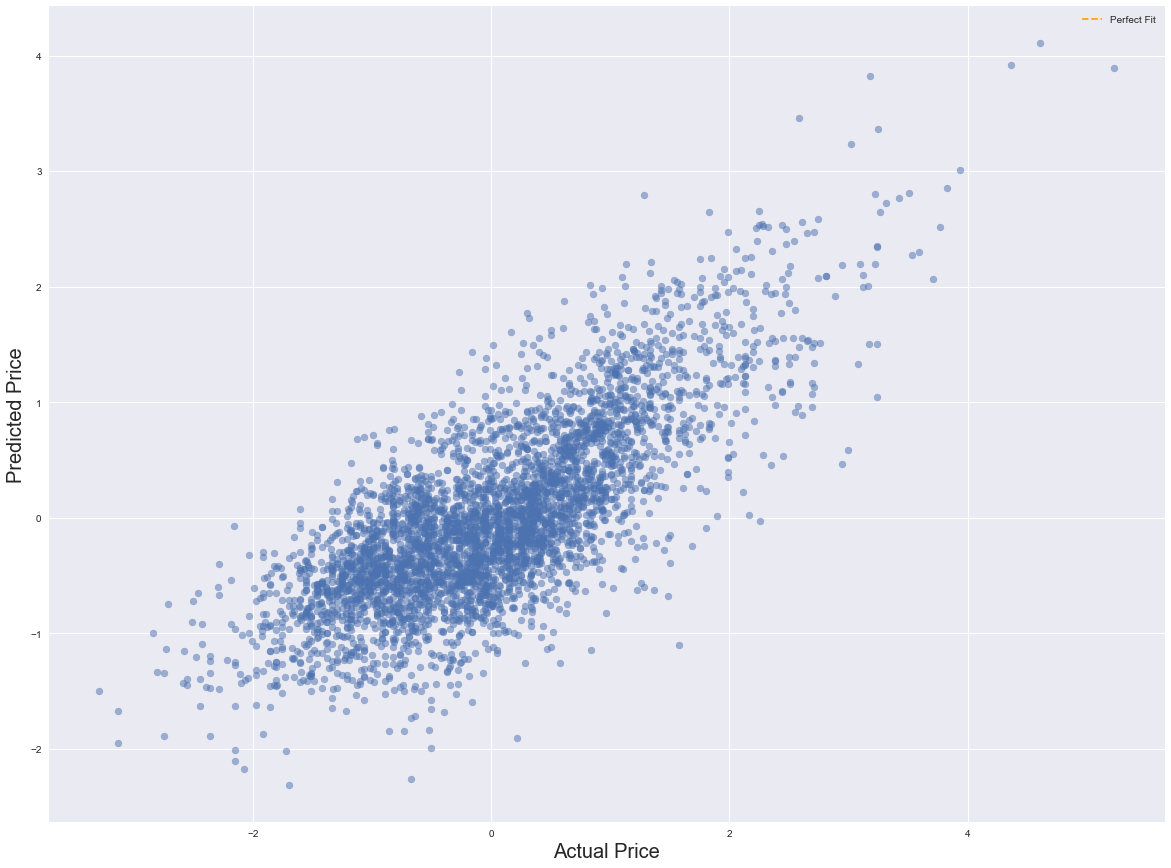

In [94]:
preds = forth_model.predict(X_test_final)
fig, ax = plt.subplots(figsize=(20,15))
perfect_line = np.arange(y_test_scale.min()/100000, y_test_scale.max()/100000)
ax.plot(perfect_line, linestyle="--", color ="orange", label = "Perfect Fit")
ax.scatter(y_test_scale, preds, alpha = 0.5)
ax.set_xlabel("Actual Price",size = 20)
ax.set_ylabel("Predicted Price",size = 20)
ax.legend();

##### Normality
Now let's check whether the normality assumption holds for our model.

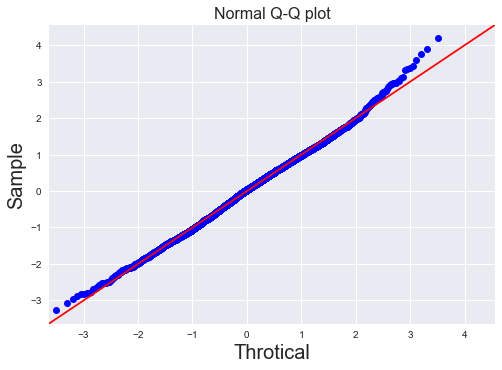

In [95]:
# Imports for data analysis
import scipy.stats as stats
# Set data
residuals = (y_test_scale - preds)
# create the graph
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True )
# set title
plt.title("Normal Q-Q plot", size=16)
# label the axis
plt.xlabel('Throtical', size=20)
plt.ylabel('Sample', size=20)
plt.show();

 We are holding the normality assumption

##### Investigating Multicollinearity (Independence Assumption)
Another way to measure multicollinearity is with variance inflation factor (StatsModels documentation here). A "rule of thumb" for VIF is that 5 is too high (i.e. strong multicollinearity).

Run the code below to find the VIF for each feature.

In [96]:
# import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = X_train_forth_model
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

print(vif_data)

                feature       VIF
0       sqft_living_log  3.498847
1          sqft_lot_log  1.257018
2          bedrooms_log  1.807668
3        waterfront_YES  1.030074
4    grade_11 Excellent  1.155454
5       grade_12 Luxury  1.057752
6      grade_13 Mansion  1.018928
7           grade_4 Low  1.018615
8          grade_5 Fair  1.112276
9   grade_6 Low Average  1.552265
10      grade_7 Average  1.962538
11         grade_8 Good  1.590527
12       grade_9 Better  1.467518
13       condition_Good  1.519343
14  condition_Very Good  1.174374
15           floors_1.5  1.196839
16           floors_2.0  2.267283
17           floors_2.5  1.043852


We are below 5 for all features in the final model, so we don't have too high of multicollinearity

##### Homoscedasticity
Now let's check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

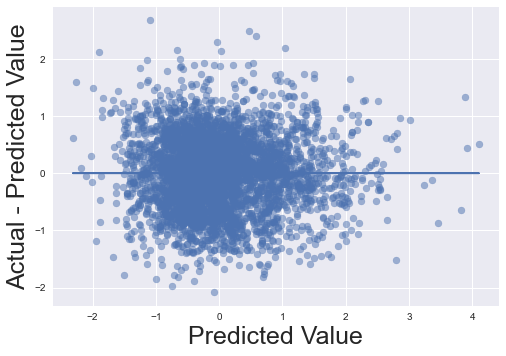

In [97]:
# Creating a figure 
fig, ax = plt.subplots()
# plotting the data
ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
# Adding the labels
ax.set_xlabel("Predicted Value",size = 25)
ax.set_ylabel("Actual - Predicted Value",size = 25);

We are holding Homoscedasticity

#### Interpret the coefficient :

Interpret the coefficient as the percent increase in the dependent variable for every 1% increase in the independent variable.

1.sqft_living_log coefficient = 0.450: 
y = b0+b1 x
log (y)= b0+ b1 log(x)
b1= 0.45 
we would say every 1% increase in the independent variable(sqftliving), our dependent variable(price) increases by about 0.45 % when other features still constant.

for every 1 unit increase in (sqftliving) price will increase about 18% based on this equation
y% = 100*(1.45 e.45 -1)*100 =18%



2.Waterfront_YES coefficient = 1.185933:
Only the dependent/response variable is log-transformed and independent variable (waterfront_YES ) is catogarical .

log(price)= b0+b1(waterfront_YES )
log(price) = .955+1.19 (waterfront_YES )
the exponentiated value of.995 = 2.7

What can we say about the coefficient for waterfront_YES  ? In the log scale,
it is the difference in the expected price means of the log of  between the waterfront_yes and waterfront_no.
In the original scale of the variable ,it is the ratio of the price mean of  for waterfront_yes  over the  mean of  price for waterfront_no. 

In terms of percent change, we can say that switching from waterfront_no to waterfront_yes, we expect to see about increase in the price .
exp(1.199941)/exp(.955)=1.25 that means waterfront feature can increase the price by 25% percent more than if the house does not have this feature.

for every 1 unit increase in waterfront_YES associated with 100(e^b1-1)percent change in price 100*(e^1.18-1)= 225 % .


3- Grade_11 Excellent cofficient = 0.435 
every 1 % increase in the independent variable (grade_11 Excellent) can cause increase the price by 0.44 %.

for every 1 unit increase in grade_11 Excellent associated with 100(e^b1-1)percent change in price 100*(e^.435-1)= 54% .

4-Grade_12 Luxury cofficient = 0.910 
every 1 % increase in the independent variableThe (grade_12 Luxury )can increase the price by 0.91 %

for every 1 unit increase in grade_12 Luxury  associated with 100(e^b1-1)percent change in price 100*(e^.91-1)= 147%

5-Grade_13 Mansion cofficient = 1.775151 
every 1 % increase in the independent variableThe ( grade_13 Mansion ) can increase the price by 1.8 %

for every 1 unit increase in grade_13 Mansion associated with 100(e^b1-1)percent change in price 100*(e^1.8-1) = 380 %

6-condition_Good cofficient = 0.134704 
every 1 % increase in the independent variable (condition_Good) can increase the price by 0.135 %
for every 1 unit increase in condition_Good associated with 100(e^b1-1)percent change in price 100*(e^.134 -1) = 14 %

7-condition_Very Good cofficient = 0.366207 
every 1 % increase in the independent variable(condition_Good) can increase the price by 0.37 %
for every 1 unit increase in condition_Good associated with 100(e^b1-1)percent change in price 100*(e^.366 -1) = 44 %

8-floors_1.5 cofficient = 0.288 
every 1 % increase in the independent variable(floors  1.5 ) can increase the price by 0.29 %
for every 1 unit increase in floors 1.5 associated with 100(e^b1-1)percent change in price 100*(e^.288 -1) = 33 %

9-floors_2.5 cofficient = 0.199 
every 1 % increase in the independent variable (floors to 2.5) can increase the price by 0.20 %
for every 1 unit increase in floors_2.5 associated with 100(e^b1-1)percent change in price 100*(e^.199 -1) = 22 %

# Regression Results

According to our final model,We got some houses features impact the house's price posatibvally .That means if these features provided in the house the houses prices would increase.

#### Interpret the Final Model
Below, we will create a data frame containes the feature and its amount of impact to the price
use pd.DataFrame

In [98]:
# create a data frame
forth_model_df = pd.DataFrame(forth_model.coef_, index=X_train_forth_model.columns)
forth_model_df

,0
sqft_living_log,0.450308
sqft_lot_log,-0.103236
bedrooms_log,-0.090273
waterfront_YES,1.199941
grade_11 Excellent,0.435868
grade_12 Luxury,0.910544
grade_13 Mansion,1.775151
grade_4 Low,-1.967157
grade_5 Fair,-1.817413
grade_6 Low Average,-1.592403


In [99]:
# sort the coefficent values from the large to small.
forth_model_df = forth_model_df.sort_values(by = 0 , ascending = [False])
forth_model_df

,0
grade_13 Mansion,1.775151
waterfront_YES,1.199941
grade_12 Luxury,0.910544
sqft_living_log,0.450308
grade_11 Excellent,0.435868
condition_Very Good,0.376949
floors_1.5,0.288879
floors_2.5,0.199287
condition_Good,0.146247
bedrooms_log,-0.090273


we will choose only the top 5 values 

In [100]:
# choose only top 5 rows from the dataframe
top5_Coefficients = forth_model_df.iloc[0:5]
top5_Coefficients

,0
grade_13 Mansion,1.775151
waterfront_YES,1.199941
grade_12 Luxury,0.910544
sqft_living_log,0.450308
grade_11 Excellent,0.435868


##### Visualization
We will use seaborn and matplotlib libraries to visualize our result

Text(0, 0.5, 'Features')

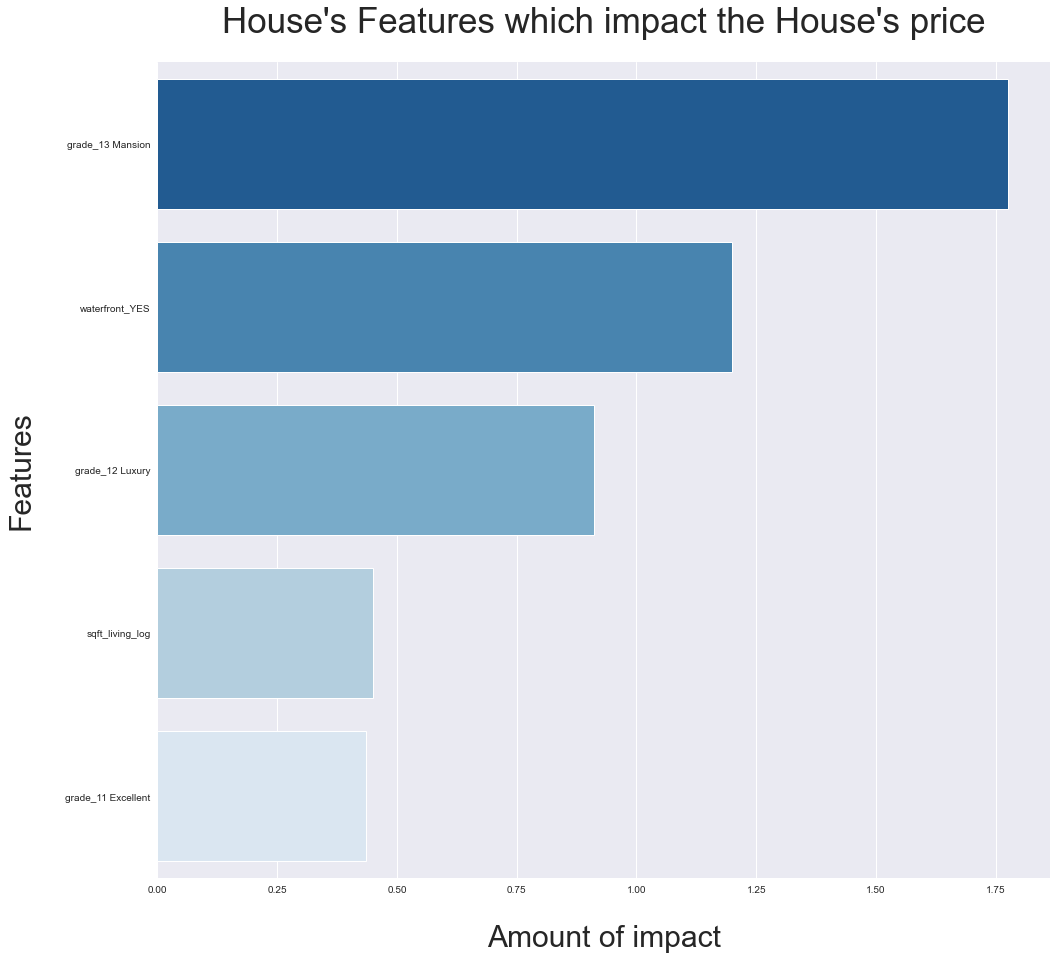

In [101]:
# set the figure size
fig, ax = plt.subplots(figsize=(16,15))
# set the plot style 
sns.set(style = "darkgrid")
# set the font size
#sns.set(font_scale = 5)

# Create bars 
data = top5_Coefficients
sns.barplot(x = top5_Coefficients[0], y =top5_Coefficients.index , orient='h',palette="Blues_r")
# Add title and axis names
plt.title("House's Features which impact the House's price",pad=30,fontsize=35)
plt.xlabel('Amount of impact',labelpad=30,fontsize=30 )
plt.ylabel('Features',labelpad=30,fontsize=30)

The top five features increases the house prices are:

1-Grade_13 Mansion : Every 1 % increase in the independent variable ( grade13 Mansion ) can increase the price by 1.8 %

2-Waterfront : Every 1 % increase in the independent variable (waterfront) can increase the price by 1.2 %

3-Grade_12 Luxury : Every 1 % increase in the independent variable(grade12 Luxury) can increase the price by 
.91 %

4-Squre footage living : Every 1 % increase in the independent variable (sqftliving) can increase the price by
.45%.

5-Grade_11 Excellent : Every 1 % increase in the independent variable (grade11 Excellent) can increase the price by 0.44%.

### Conclusions and Recommendations

Based on our model when homeowners improve some features on thier homes ,their home's values increase as well.

The top renovation, remodeling focuse on the home's grade,waterfront view,
home's squre footage living and home's conditions  :

1- Improve the  grade :
The grade concept refers to the quality of materials and quality of workmanship used during the building process.Buildings of better quality (higher grade) cost more.

Top three Classification by construction quality are:

*Grade-13 mansion : A mansion will be built on a large property and spesific architactal design either classical-style, colonial-style, or Victorian-style,
with tall cellings ,large enteries and windows.
Mansions are built of premium materials such as high-grade wood, superior stonework, customized fabrics and furnishings, marble countertops, ornate granite mantelpieces, 
Most modern mansions will also use smart and energy-efficient technologies it will have features more than a first-class hotel.The home meets these criteria Approaching the Mansion level thier prices would icreased  around 380% .

*grade_12 Luxury :
Some homes described as luxurious and impressive .This means house will offer a lot more than basic home functionality,an excess amount of bedrooms and bathrooms and additional rooms built specifically for a singular purpose like (theater , gyms,pool,spa rooms these homes also built with a very high quality materials. Quality can be observed, such as solid, level floors, plumb walls, smooth plastered wall/ceiling areas, mitered woodwork joints, properly fit doors and windows, are all indications of better quality workmanship.
The Luxury feature can increase the home's price around 147%.

*grade_11 Excellent:
The residence is in perfect or near perfect condition. Residence is either new or all items that can normally be replaced, repaired Examples are new roofing, siding, new paint, new interior finish, heating system.This feature can increase the price around 54 % .


2-Waterfront houses:
If most people were given the choice, they would prefer to live near a body of water.
Oceanfront, relative to rivers and lakes, has generally been demonstrated as having more impact on residential property value.
A great view will fetch around 25% than homes at the same conditions without waterside.
waterfront feature can increase the price up to 225 % .

3-Improve the square footage of interior housing living space:

Every 1 unit in square footage increase leads price to increase by 18%

While it’s possible to gain additional living space by :
expanssion the main floor or add a new floor both choices are a great way to enlarge a bedroom or add new floor space for general use. 
expanssion the main floor to 1.5  can increases the house's price by 33 %.
expanssion the the second floors to 2.5 can increases the house's price by 22 %

4-Conditions :

The fact that critical parts of the house, like plumbing,electrical,the roof, and appliances are in Updates and upgrades can add value to the home, especially in older homes that may have outdated features.

*Very Good :All items are well maintained,many having been replaced or updated. Repairs and refinishing are not needed this feature can increase the price by 44 %

*Good : No obvious maintenance required, but neither is everything new. 
Short lived items such as interior floor coverings, roofing show few signs of wear and have several years of life remaining. Only minor repairs or refinishing would be needed to put the property in a good condition and this feature increases the price by 14%.


### Next Steps
Further analyses could yield additional insights to further improve the model performance.